In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testset_36.csv
/kaggle/input/trainset_36.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/trainset_36.csv")
test_df = pd.read_csv("/kaggle/input/testset_36.csv")

In [3]:
train_df

,Unnamed: 0,long,lat,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label
0,15394,106.022927,19.989621,1603.0,1451.0,1272.0,1081.0,1140.0,1385.0,1577.0,1191.0,1606.0,291.0,8.0,1176.0,776.0,aquaculture
1,20336,105.282254,19.511918,1210.5,904.5,765.0,456.5,736.0,2075.0,2728.5,2814.0,2957.5,455.0,10.0,1671.0,717.5,forest
2,301,105.748235,19.871996,1513.5,1325.5,1199.5,911.0,1139.5,1862.5,2171.5,1997.5,2324.0,267.0,11.0,1196.5,556.5,ricepaddies
3,16184,105.919754,19.807347,1625.5,1333.5,1206.5,965.0,1076.0,1210.0,1264.5,1395.5,1266.0,145.0,7.5,877.5,560.5,aquaculture
4,8773,105.811369,19.306709,1608.5,1376.5,1268.5,1194.0,1145.5,1306.0,1427.0,1375.0,1680.5,312.0,11.0,2117.5,2014.0,residentialland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,18886,105.411667,19.927794,1255.0,969.5,910.0,581.0,925.5,2423.5,3032.0,2798.5,3375.5,432.5,8.5,1617.0,676.0,cropland
10916,22197,105.733773,19.561753,1409.5,1199.5,1103.5,861.0,1038.5,2182.0,2995.5,2836.0,3308.0,318.0,8.5,1424.5,607.5,ricepaddies
10917,689,105.960747,20.005745,1643.0,1283.0,1184.0,972.0,1274.0,2267.0,2687.0,2684.0,2915.0,467.0,11.0,2117.0,1291.0,cropland
10918,22644,105.348105,19.659734,1137.0,841.0,715.0,411.0,691.0,1835.5,2349.5,2241.0,2681.0,442.0,10.0,1415.5,573.5,forest


In [4]:
# train_df = train_df[train_df['label'] != 'shrubland']
# test_df = test_df[test_df['label'] != 'shrubland']

In [5]:
from sklearn.preprocessing import LabelEncoder
def preprocess_data(df):
    # Drop long, lat
    df.drop(columns=["long", "lat","Unnamed: 0"], inplace=True) 
    
    # Encode cột label 
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['label'])
    print(f"Label encoding for {'label'}:")
    for label, num in zip(le.classes_, range(len(le.classes_))):
        print(f"{label} -> {num}")

In [6]:
preprocess_data(train_df), preprocess_data(test_df)

Label encoding for label:
aquaculture -> 0
barrenland -> 1
cropland -> 2
forest -> 3
grassland -> 4
open_water -> 5
residentialland -> 6
ricepaddies -> 7
shrubland -> 8
wetlands -> 9
Label encoding for label:
aquaculture -> 0
barrenland -> 1
cropland -> 2
forest -> 3
grassland -> 4
open_water -> 5
residentialland -> 6
ricepaddies -> 7
shrubland -> 8
wetlands -> 9


(None, None)

In [7]:
train_df

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label
0,1603.0,1451.0,1272.0,1081.0,1140.0,1385.0,1577.0,1191.0,1606.0,291.0,8.0,1176.0,776.0,0
1,1210.5,904.5,765.0,456.5,736.0,2075.0,2728.5,2814.0,2957.5,455.0,10.0,1671.0,717.5,3
2,1513.5,1325.5,1199.5,911.0,1139.5,1862.5,2171.5,1997.5,2324.0,267.0,11.0,1196.5,556.5,7
3,1625.5,1333.5,1206.5,965.0,1076.0,1210.0,1264.5,1395.5,1266.0,145.0,7.5,877.5,560.5,0
4,1608.5,1376.5,1268.5,1194.0,1145.5,1306.0,1427.0,1375.0,1680.5,312.0,11.0,2117.5,2014.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,1255.0,969.5,910.0,581.0,925.5,2423.5,3032.0,2798.5,3375.5,432.5,8.5,1617.0,676.0,2
10916,1409.5,1199.5,1103.5,861.0,1038.5,2182.0,2995.5,2836.0,3308.0,318.0,8.5,1424.5,607.5,7
10917,1643.0,1283.0,1184.0,972.0,1274.0,2267.0,2687.0,2684.0,2915.0,467.0,11.0,2117.0,1291.0,2
10918,1137.0,841.0,715.0,411.0,691.0,1835.5,2349.5,2241.0,2681.0,442.0,10.0,1415.5,573.5,3


In [8]:
def add_features(df):
    df['NDVI'] = (df['B8'] - df['B4']) / (df['B8'] + df['B4'])
    df['NDWI'] = (df['B3'] - df['B8']) / (df['B3'] + df['B8'])
    df['NDMI'] = (df['B8A'] - df['B11']) / (df['B8A'] + df['B11'])
    df['NDBI'] = (df['B11'] - df['B8']) / (df['B11'] + df['B8'])
    df['BSI'] = ((df['B12'] + df['B8']) - (df['B4'] + df['B3'])) / ((df['B12'] + df['B8']) + (df['B4'] + df['B3']))
    # df['EVI'] = 2.5 * (df['B8'] - df['B4']) / (df['B8'] + 6 * df['B4'] - 7.5 * df['B2'] + 1) # Trường này có - ở mẫu nên khả năng thành NaN hoặc inf là tương đối cao
    L = 0.5
    df['SAVI'] = ((df['B8'] - df['B4']) * (1 + L)) / (df['B8'] + df['B4'] + L) # (Soil Adjusted Vegetation Index) – NDVI hiệu chỉnh ảnh hưởng của đất
    return df

train_df = add_features(train_df.copy())
test_df = add_features(test_df.copy())
train_df

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label,NDVI,NDWI,NDMI,NDBI,BSI,SAVI
0,1603.0,1451.0,1272.0,1081.0,1140.0,1385.0,1577.0,1191.0,1606.0,291.0,8.0,1176.0,776.0,0,0.048415,0.032887,0.154565,-0.006337,-0.089352,0.072607
1,1210.5,904.5,765.0,456.5,736.0,2075.0,2728.5,2814.0,2957.5,455.0,10.0,1671.0,717.5,3,0.720838,-0.572506,0.277952,-0.254849,0.486009,1.081091
2,1513.5,1325.5,1199.5,911.0,1139.5,1862.5,2171.5,1997.5,2324.0,267.0,11.0,1196.5,556.5,7,0.373560,-0.249609,0.320267,-0.250783,0.095080,0.560244
3,1625.5,1333.5,1206.5,965.0,1076.0,1210.0,1264.5,1395.5,1266.0,145.0,7.5,877.5,560.5,0,0.182377,-0.072636,0.181246,-0.227893,-0.052211,0.273507
4,1608.5,1376.5,1268.5,1194.0,1145.5,1306.0,1427.0,1375.0,1680.5,312.0,11.0,2117.5,2014.0,6,0.070455,-0.040287,-0.115061,0.212598,0.158335,0.105663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,1255.0,969.5,910.0,581.0,925.5,2423.5,3032.0,2798.5,3375.5,432.5,8.5,1617.0,676.0,2,0.656162,-0.509236,0.352228,-0.267580,0.399456,0.984098
10916,1409.5,1199.5,1103.5,861.0,1038.5,2182.0,2995.5,2836.0,3308.0,318.0,8.5,1424.5,607.5,7,0.534217,-0.439777,0.397993,-0.331299,0.273484,0.801217
10917,1643.0,1283.0,1184.0,972.0,1274.0,2267.0,2687.0,2684.0,2915.0,467.0,11.0,2117.0,1291.0,2,0.468271,-0.387797,0.158585,-0.118100,0.296689,0.702311
10918,1137.0,841.0,715.0,411.0,691.0,1835.5,2349.5,2241.0,2681.0,442.0,10.0,1415.5,573.5,3,0.690045,-0.516238,0.308922,-0.225762,0.428499,1.034873


# Model

In [9]:
from sklearn.model_selection import train_test_split
def gen_train_test():
    X_train = train_df.drop(columns=['label'])
    y_train = train_df['label']
    X_test = test_df.drop(columns=['label'])
    y_test = test_df['label']
    return X_train, X_test, y_train, y_test

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    classification_report
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap

def display_confusion_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

def display_result(y_test,y_pred, model):
    print("📊 Evaluation Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
    
    print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
    display_confusion_matrix(y_test, y_pred, model)

In [11]:
X_train, X_test, y_train, y_test = gen_train_test()

In [12]:
def evaluate_models(X_train, X_test, y_train, y_test, model_name="Original"):
    print(f"\n{'='*50}")
    print(f"Đánh giá mô hình với {model_name} features")
    print(f"{'='*50}")
    print(f"Số lượng features: {X_train.shape[1]}")
    
    # Chuẩn hóa dữ liệu cho SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 1. SVM
    print("\n🔹 Support Vector Machine (SVM)")
    svm_model = SVC(kernel='rbf', C=100, gamma = 'auto')
    svm_model.fit(X_train_scaled, y_train)
    svm_pred = svm_model.predict(X_test_scaled)
    display_result(y_test, svm_pred, svm_model)
    
    # 2. LightGBM
    print("\n🔹 LightGBM")
    lgbm_model = lgb.LGBMClassifier(
        objective='multiclass',
        num_class=len(np.unique(y_train)),
        n_estimators=100,
        learning_rate=0.1,
        max_depth=-1,
        random_state=42
    )
    lgbm_model.fit(X_train, y_train)
    lgbm_pred = lgbm_model.predict(X_test)
    display_result(y_test, lgbm_pred, lgbm_model)
    
    # 3. Random Forest
    print("\n🔹 Random Forest")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    display_result(y_test, rf_pred, rf_model)
    
    # 4. XGBoost
    print("\n🔹 XGBoost")
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    display_result(y_test, xgb_pred, xgb_model)
    
    return {
        'svm': svm_model,
        'lgbm': lgbm_model,
        'rf': rf_model,
        'xgb': xgb_model
    }

In [13]:
def select_features(X_train, X_test, feature_importances, threshold=None):
    # Lấy tên của các features
    feature_names = X_train.columns
    
    # Tạo DataFrame với feature names và importance scores
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)

    K = 11
    if (threshold is None):
        threshold = feature_importance_df.iloc[K-1]['importance']
    
    # Hiển thị biểu đồ feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    # Chọn các features có importance > threshold
    selected_features = feature_importance_df[feature_importance_df['importance'] > threshold]['feature'].tolist()
    print(f"Số lượng features được chọn: {len(selected_features)} / {len(feature_names)}")
    print("Các features được chọn:", selected_features[:10], "..." if len(selected_features) > 10 else "")
    
    # Trả về tập dữ liệu đã lọc
    return X_train[selected_features], X_test[selected_features], selected_features

### No Selection


Đánh giá mô hình với Original features
Số lượng features: 19

🔹 Support Vector Machine (SVM)
📊 Evaluation Metrics:
Accuracy : 0.8970695970695971
Precision: 0.8921025340133175
Recall   : 0.8970695970695971
F1 Score : 0.8935732785936203

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       220
           1       0.86      0.85      0.85       120
           2       0.79      0.90      0.84       420
           3       0.94      0.93      0.93       430
           4       0.81      0.72      0.76       150
           5       0.92      0.92      0.92       430
           6       0.97      0.96      0.97       440
           7       0.94      0.94      0.94       440
           8       0.00      0.00      0.00        20
           9       0.78      0.60      0.68        60

    accuracy                           0.90      2730
   macro avg       0.79      0.77      0.78      2730
weighted avg       0.89      0.90

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


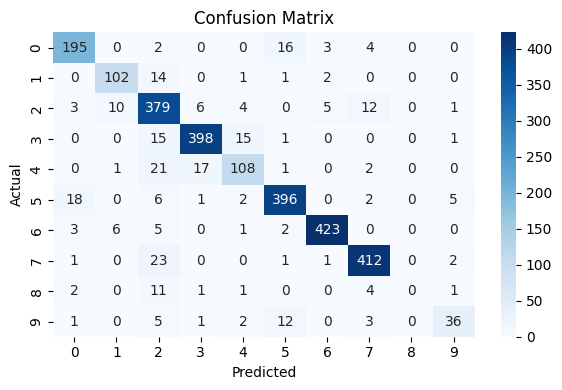


🔹 LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4612
[LightGBM] [Info] Number of data points in the train set: 10920, number of used features: 19
[LightGBM] [Info] Start training from score -2.518429
[LightGBM] [Info] Start training from score -3.124565
[LightGBM] [Info] Start training from score -1.871802
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -2.901422
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -4.916325
[LightGBM] [Info] Start training from score -3.817712
📊 Evaluation Metrics:
Accuracy : 0.9106227106227106
Precision: 0.9117737743339771
Recall   : 0.9106227106227106
F1 Score : 0.9071851550474157

📋 Classification

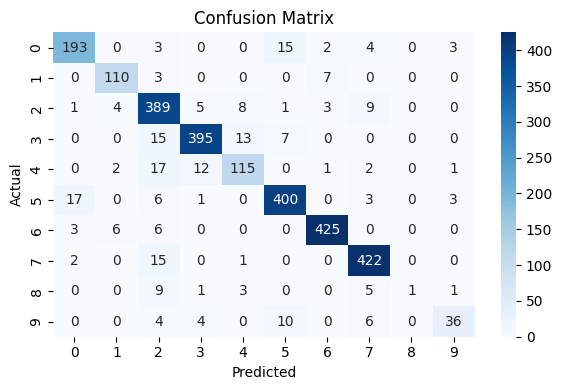


🔹 Random Forest
📊 Evaluation Metrics:
Accuracy : 0.8871794871794871
Precision: 0.8823087086824561
Recall   : 0.8871794871794871
F1 Score : 0.8817255463531253

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       220
           1       0.87      0.85      0.86       120
           2       0.78      0.91      0.84       420
           3       0.92      0.95      0.93       430
           4       0.84      0.65      0.73       150
           5       0.91      0.92      0.91       430
           6       0.95      0.95      0.95       440
           7       0.92      0.93      0.93       440
           8       0.00      0.00      0.00        20
           9       0.90      0.45      0.60        60

    accuracy                           0.89      2730
   macro avg       0.79      0.74      0.76      2730
weighted avg       0.88      0.89      0.88      2730



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


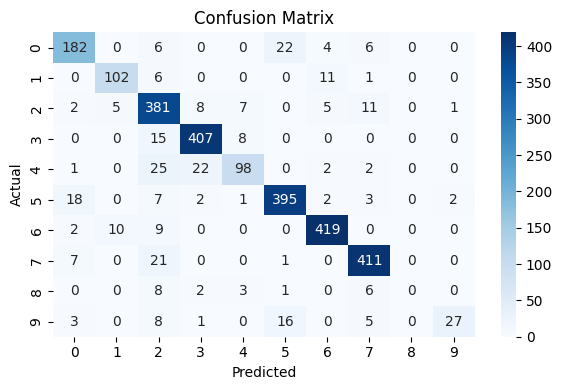


🔹 XGBoost
📊 Evaluation Metrics:
Accuracy : 0.8937728937728938
Precision: 0.8885124119555019
Recall   : 0.8937728937728938
F1 Score : 0.8900127733472218

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       220
           1       0.87      0.87      0.87       120
           2       0.79      0.91      0.85       420
           3       0.95      0.92      0.93       430
           4       0.82      0.72      0.77       150
           5       0.91      0.92      0.91       430
           6       0.97      0.96      0.96       440
           7       0.92      0.94      0.93       440
           8       0.00      0.00      0.00        20
           9       0.74      0.58      0.65        60

    accuracy                           0.89      2730
   macro avg       0.78      0.77      0.77      2730
weighted avg       0.89      0.89      0.89      2730



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


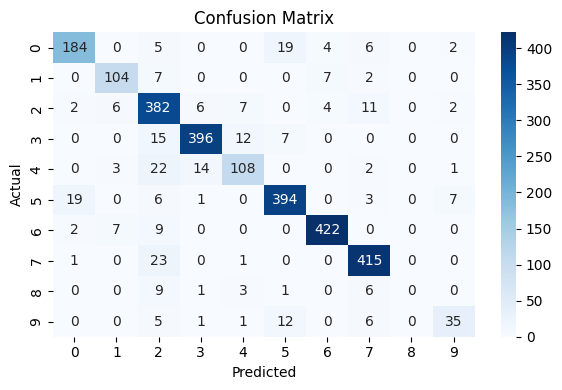

In [14]:
original_models = evaluate_models(X_train, X_test, y_train, y_test, "Original")

## LightGBM Selection

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4612
[LightGBM] [Info] Number of data points in the train set: 10920, number of used features: 19
[LightGBM] [Info] Start training from score -2.518429
[LightGBM] [Info] Start training from score -3.124565
[LightGBM] [Info] Start training from score -1.871802
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -2.901422
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -4.916325
[LightGBM] [Info] Start training from score -3.817712

Calculating SHAP values for LightGBM model...


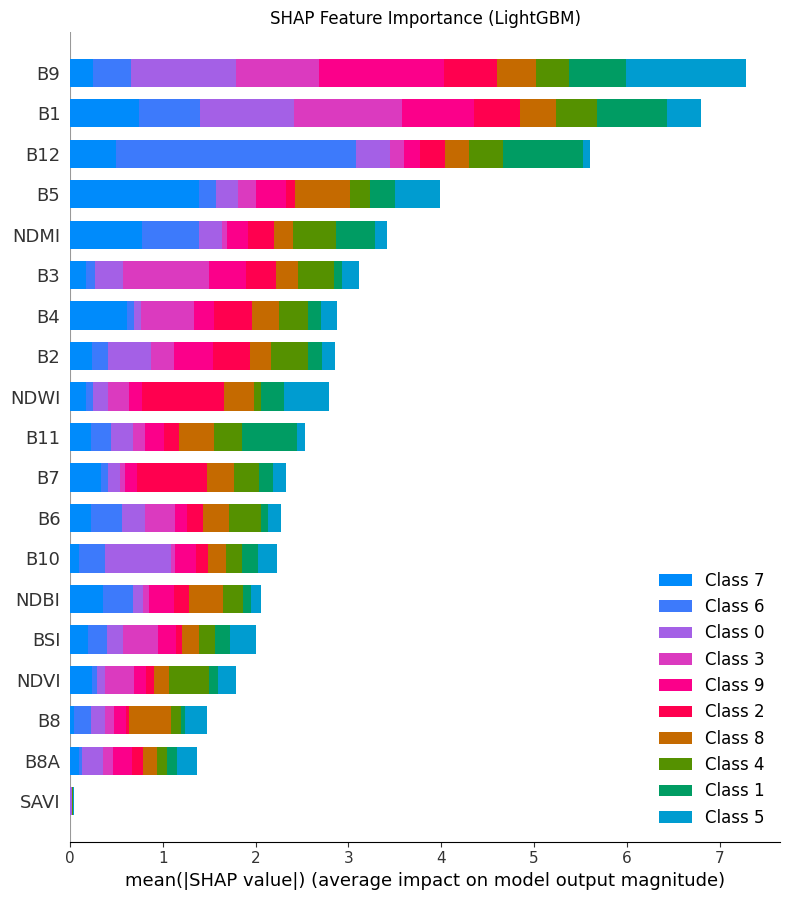

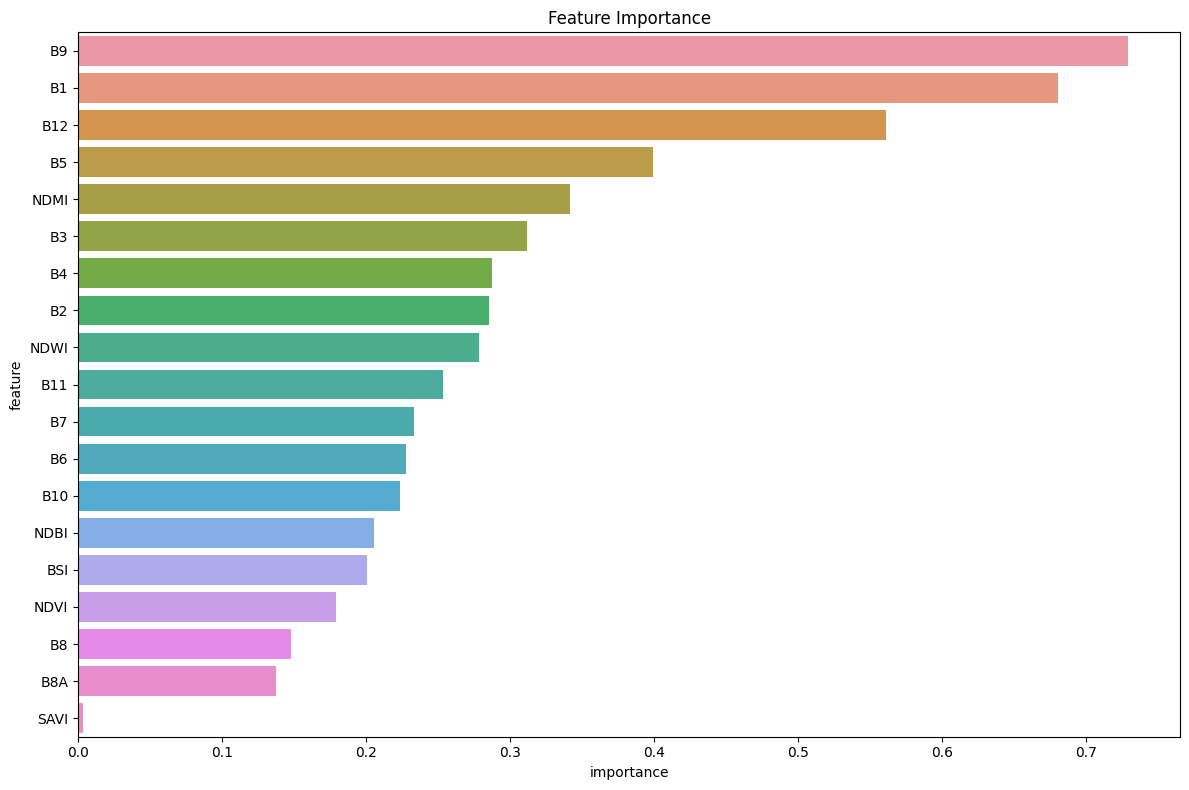

Số lượng features được chọn: 10 / 19
Các features được chọn: ['B9', 'B1', 'B12', 'B5', 'NDMI', 'B3', 'B4', 'B2', 'NDWI', 'B11'] 

Đánh giá mô hình với LightGBM SHAP Selected features
Số lượng features: 10

🔹 Support Vector Machine (SVM)
📊 Evaluation Metrics:
Accuracy : 0.8897435897435897
Precision: 0.8839949166051806
Recall   : 0.8897435897435897
F1 Score : 0.885790946815486

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       220
           1       0.83      0.79      0.81       120
           2       0.79      0.90      0.84       420
           3       0.92      0.94      0.93       430
           4       0.83      0.70      0.76       150
           5       0.91      0.91      0.91       430
           6       0.97      0.95      0.96       440
           7       0.93      0.94      0.93       440
           8       0.00      0.00      0.00        20
           9       0.73      0.58      0.65        60


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


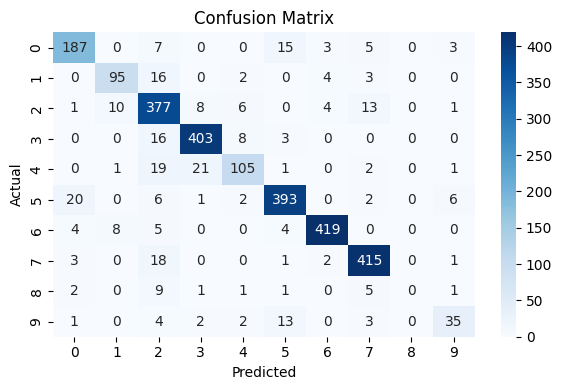


🔹 LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 10920, number of used features: 10
[LightGBM] [Info] Start training from score -2.518429
[LightGBM] [Info] Start training from score -3.124565
[LightGBM] [Info] Start training from score -1.871802
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -2.901422
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -4.916325
[LightGBM] [Info] Start training from score -3.817712
📊 Evaluation Metrics:
Accuracy : 0.9003663003663004
Precision: 0.8946984541768517
Recall   : 0.9003663003663004
F1 Score : 0.8966470974635381

📋 Classification

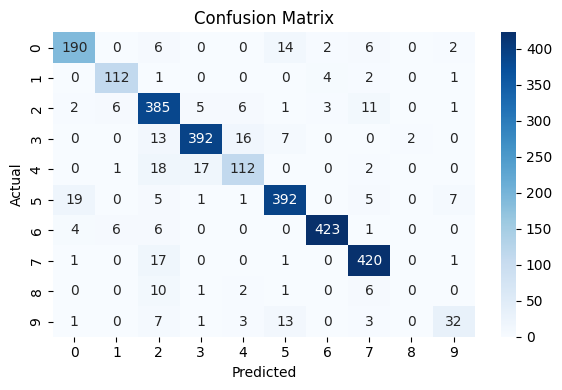


🔹 Random Forest
📊 Evaluation Metrics:
Accuracy : 0.8945054945054945
Precision: 0.888387552231989
Recall   : 0.8945054945054945
F1 Score : 0.889645145579922

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       220
           1       0.85      0.88      0.87       120
           2       0.81      0.91      0.86       420
           3       0.94      0.93      0.93       430
           4       0.83      0.71      0.77       150
           5       0.90      0.91      0.91       430
           6       0.96      0.96      0.96       440
           7       0.91      0.95      0.93       440
           8       0.00      0.00      0.00        20
           9       0.86      0.50      0.63        60

    accuracy                           0.89      2730
   macro avg       0.79      0.76      0.77      2730
weighted avg       0.89      0.89      0.89      2730



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


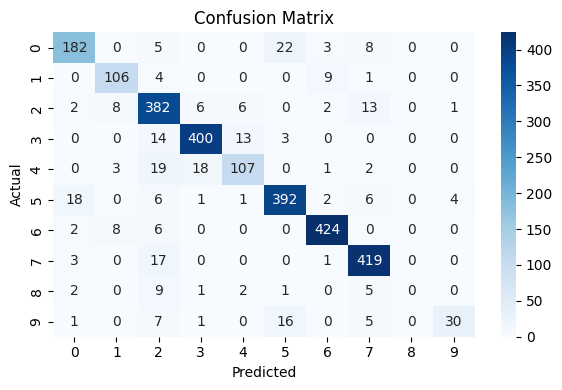


🔹 XGBoost
📊 Evaluation Metrics:
Accuracy : 0.891941391941392
Precision: 0.8870651686028849
Recall   : 0.891941391941392
F1 Score : 0.8881234726562268

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       220
           1       0.90      0.88      0.89       120
           2       0.79      0.91      0.84       420
           3       0.93      0.90      0.91       430
           4       0.80      0.68      0.73       150
           5       0.91      0.92      0.92       430
           6       0.96      0.96      0.96       440
           7       0.92      0.95      0.93       440
           8       0.00      0.00      0.00        20
           9       0.82      0.62      0.70        60

    accuracy                           0.89      2730
   macro avg       0.79      0.77      0.78      2730
weighted avg       0.89      0.89      0.89      2730



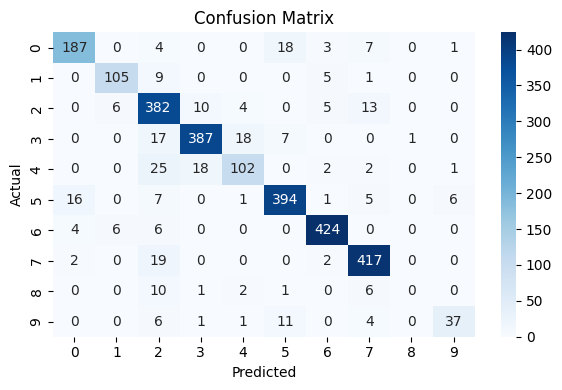

In [15]:
# Train LightGBM model để sử dụng với SHAP
lgbm_shap_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_train)),
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)
lgbm_shap_model.fit(X_train, y_train)

# Sử dụng SHAP để giải thích mô hình LightGBM
print("\nCalculating SHAP values for LightGBM model...")
explainer_lgbm = shap.TreeExplainer(lgbm_shap_model)
shap_values_lgbm = explainer_lgbm.shap_values(X_train)

# Tính mean absolute SHAP values cho từng feature
# Với mô hình đa lớp, lấy giá trị trung bình qua các lớp
shap_importance_lgbm = np.zeros(X_train.shape[1])
for class_idx in range(len(shap_values_lgbm)):
    shap_importance_lgbm += np.abs(shap_values_lgbm[class_idx]).mean(axis=0)
shap_importance_lgbm = shap_importance_lgbm / len(shap_values_lgbm)  # Normalize by number of classes

# Hiển thị SHAP summary plot cho LightGBM
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_lgbm, X_train, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (LightGBM)")
plt.tight_layout()
plt.show()

# Chọn features dựa trên SHAP values từ LightGBM
X_train_lgbm_shap_selected, X_test_lgbm_shap_selected, lgbm_shap_selected_features = select_features(
    X_train, X_test, shap_importance_lgbm
)

# Đánh giá mô hình sau khi chọn feature bằng SHAP với LightGBM
lgbm_shap_selected_models = evaluate_models(
    X_train_lgbm_shap_selected, X_test_lgbm_shap_selected, 
    y_train, y_test, "LightGBM SHAP Selected"
)

## XGBoost Selection


Calculating SHAP values for XGBoost model...


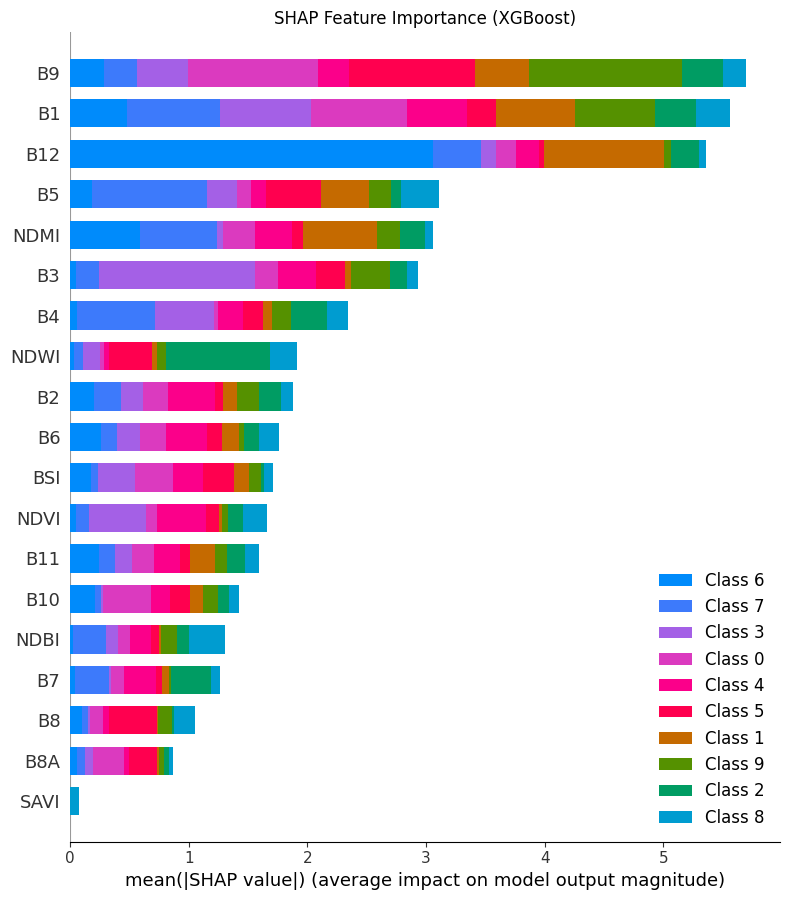

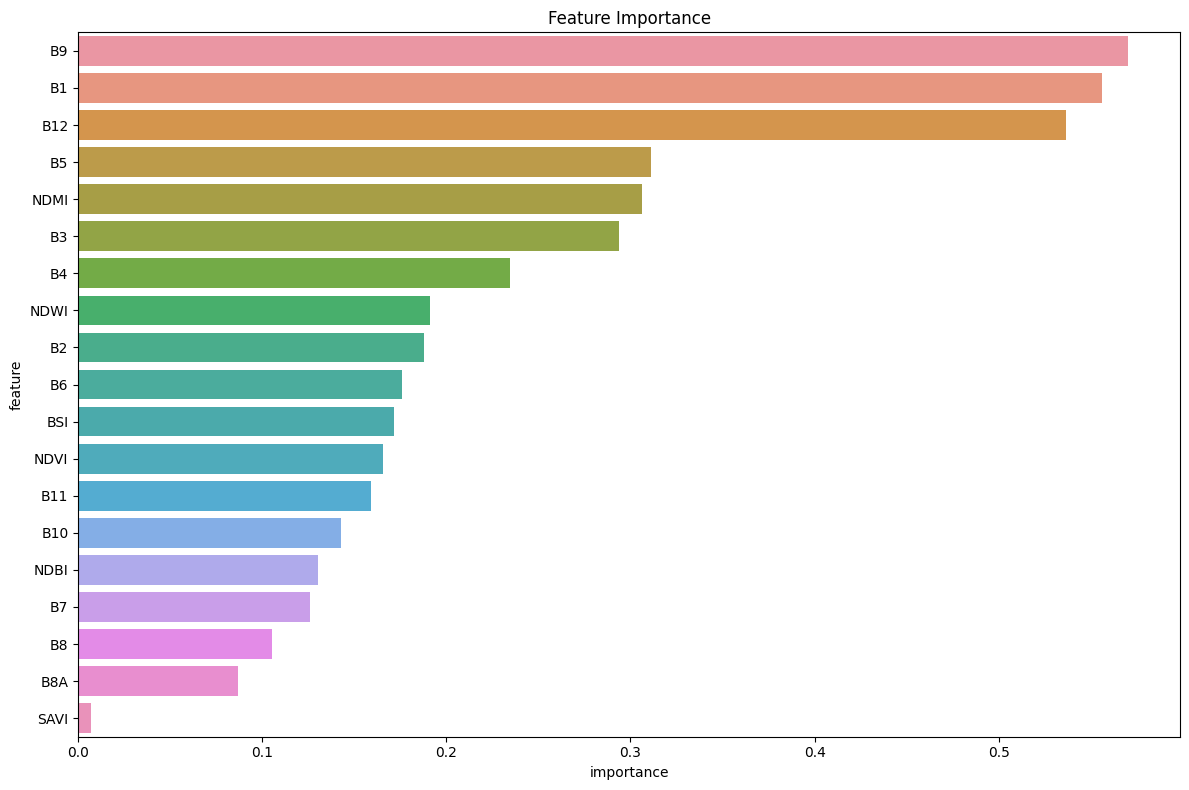

Số lượng features được chọn: 10 / 19
Các features được chọn: ['B9', 'B1', 'B12', 'B5', 'NDMI', 'B3', 'B4', 'NDWI', 'B2', 'B6'] 

Đánh giá mô hình với XGBoost SHAP Selected features
Số lượng features: 10

🔹 Support Vector Machine (SVM)
📊 Evaluation Metrics:
Accuracy : 0.8882783882783882
Precision: 0.8835275065871697
Recall   : 0.8882783882783882
F1 Score : 0.8846235563997161

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       220
           1       0.79      0.77      0.78       120
           2       0.78      0.90      0.84       420
           3       0.93      0.93      0.93       430
           4       0.81      0.70      0.75       150
           5       0.91      0.92      0.92       430
           6       0.97      0.95      0.96       440
           7       0.93      0.94      0.93       440
           8       0.00      0.00      0.00        20
           9       0.76      0.57      0.65        60



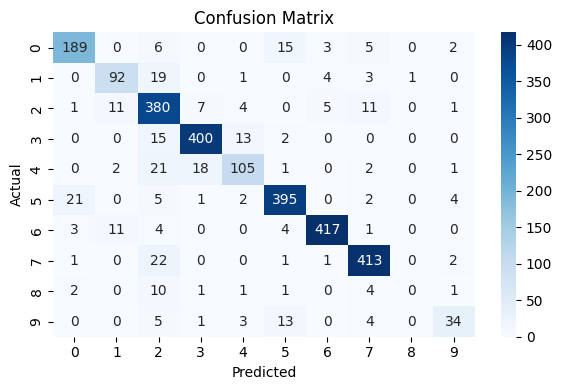


🔹 LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 10920, number of used features: 10
[LightGBM] [Info] Start training from score -2.518429
[LightGBM] [Info] Start training from score -3.124565
[LightGBM] [Info] Start training from score -1.871802
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -2.901422
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -4.916325
[LightGBM] [Info] Start training from score -3.817712
📊 Evaluation Metrics:
Accuracy : 0.895970695970696
Precision: 0.8903298057884558
Recall   : 0.895970695970696
F1 Score : 0.8922007781319885

📋 Classification R

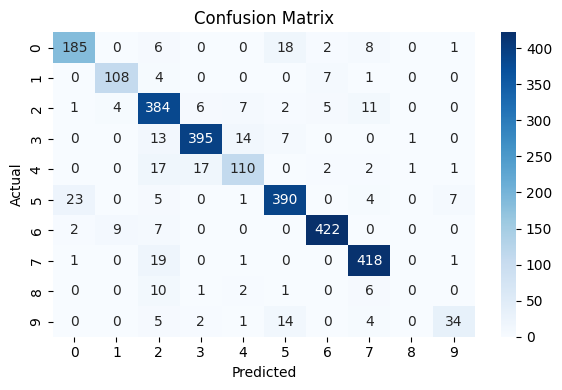


🔹 Random Forest
📊 Evaluation Metrics:
Accuracy : 0.891941391941392
Precision: 0.8858553812453877
Recall   : 0.891941391941392
F1 Score : 0.8871580747739389

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       220
           1       0.88      0.85      0.86       120
           2       0.81      0.92      0.86       420
           3       0.93      0.93      0.93       430
           4       0.84      0.70      0.76       150
           5       0.91      0.91      0.91       430
           6       0.95      0.95      0.95       440
           7       0.91      0.95      0.93       440
           8       0.00      0.00      0.00        20
           9       0.79      0.52      0.63        60

    accuracy                           0.89      2730
   macro avg       0.79      0.75      0.77      2730
weighted avg       0.89      0.89      0.89      2730



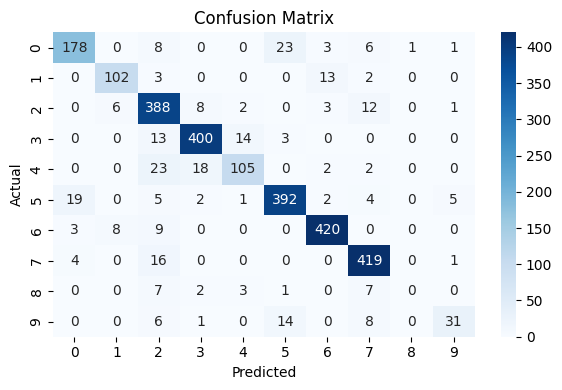


🔹 XGBoost
📊 Evaluation Metrics:
Accuracy : 0.891941391941392
Precision: 0.8867540156626706
Recall   : 0.891941391941392
F1 Score : 0.8877246934482956

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       220
           1       0.86      0.80      0.83       120
           2       0.79      0.92      0.85       420
           3       0.93      0.93      0.93       430
           4       0.84      0.69      0.75       150
           5       0.91      0.92      0.92       430
           6       0.96      0.95      0.96       440
           7       0.92      0.95      0.93       440
           8       0.00      0.00      0.00        20
           9       0.80      0.58      0.67        60

    accuracy                           0.89      2730
   macro avg       0.79      0.76      0.77      2730
weighted avg       0.89      0.89      0.89      2730



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


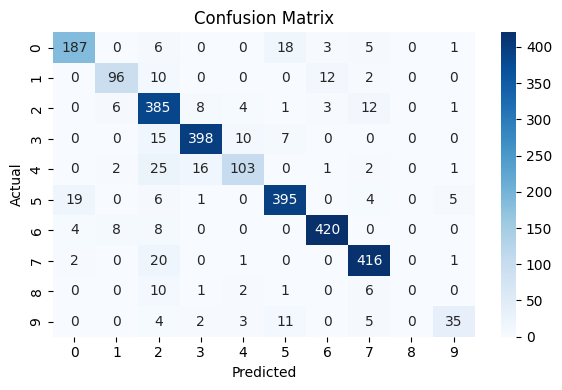

In [16]:
xgb_shap_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_shap_model.fit(X_train, y_train)

# Sử dụng SHAP để giải thích mô hình XGBoost
print("\nCalculating SHAP values for XGBoost model...")
explainer_xgb = shap.TreeExplainer(xgb_shap_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Tính mean absolute SHAP values cho từng feature
# XGBoost với đa lớp trả về shap_values có thể có cấu trúc khác so với LightGBM
# Kiểm tra cấu trúc của shap_values_xgb
if isinstance(shap_values_xgb, list):
    # Nếu là list (multi-class case), tính trung bình qua các lớp
    shap_importance_xgb = np.zeros(X_train.shape[1])
    for class_idx in range(len(shap_values_xgb)):
        shap_importance_xgb += np.abs(shap_values_xgb[class_idx]).mean(axis=0)
    shap_importance_xgb = shap_importance_xgb / len(shap_values_xgb)
else:
    # Nếu là ma trận (binary case hoặc regression)
    shap_importance_xgb = np.abs(shap_values_xgb).mean(axis=0)

# Hiển thị SHAP summary plot cho XGBoost
plt.figure(figsize=(12, 8))
try:
    # Cố gắng tạo summary plot thông thường
    shap.summary_plot(shap_values_xgb, X_train, plot_type="bar", show=False)
except Exception as e:
    print(f"Lỗi khi tạo summary plot: {e}")
    # Nếu không thể tạo summary plot, tạo bar plot đơn giản từ shap_importance_xgb
    feature_names = X_train.columns
    sorted_idx = np.argsort(shap_importance_xgb)
    plt.barh(range(len(sorted_idx)), shap_importance_xgb[sorted_idx])
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("SHAP Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()

# Chọn features dựa trên SHAP values từ XGBoost
X_train_xgb_shap_selected, X_test_xgb_shap_selected, xgb_shap_selected_features = select_features(
    X_train, X_test, shap_importance_xgb
)

# Đánh giá mô hình sau khi chọn feature bằng SHAP với XGBoost
xgb_shap_selected_models = evaluate_models(
    X_train_xgb_shap_selected, X_test_xgb_shap_selected, 
    y_train, y_test, "XGBoost SHAP Selected"
)


Training SVM model...

Calculating SHAP values for SVM model...


  0%|          | 0/50 [00:00<?, ?it/s]

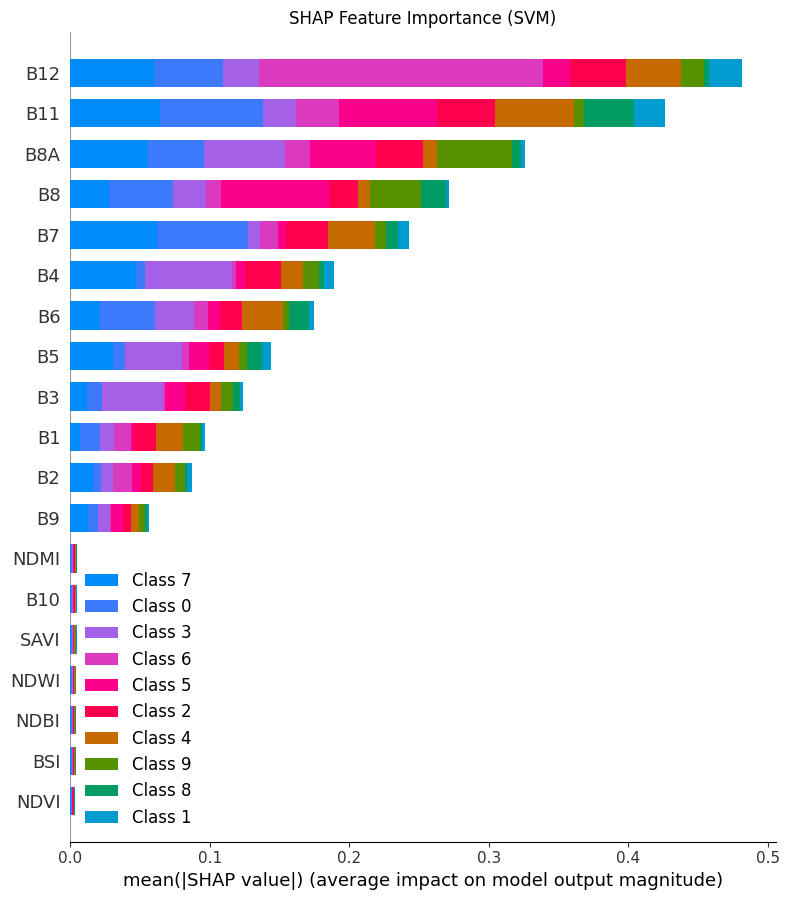

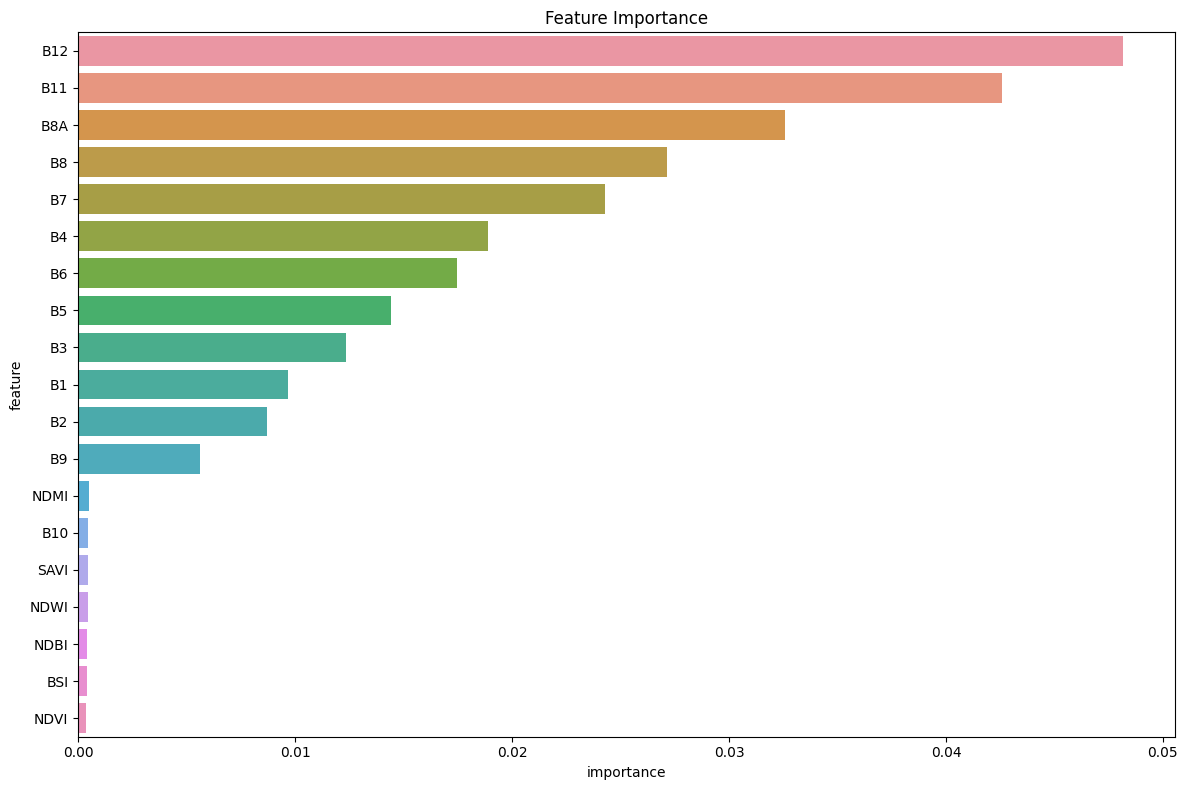

Số lượng features được chọn: 10 / 19
Các features được chọn: ['B12', 'B11', 'B8A', 'B8', 'B7', 'B4', 'B6', 'B5', 'B3', 'B1'] 

Đánh giá mô hình với SVM SHAP Selected features
Số lượng features: 10

🔹 Support Vector Machine (SVM)
📊 Evaluation Metrics:
Accuracy : 0.878021978021978
Precision: 0.8729074280308883
Recall   : 0.878021978021978
F1 Score : 0.8735030385332058

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       220
           1       0.80      0.78      0.79       120
           2       0.76      0.89      0.82       420
           3       0.90      0.94      0.92       430
           4       0.81      0.61      0.70       150
           5       0.92      0.92      0.92       430
           6       0.97      0.95      0.96       440
           7       0.92      0.93      0.93       440
           8       0.00      0.00      0.00        20
           9       0.72      0.52      0.60        60

    accu

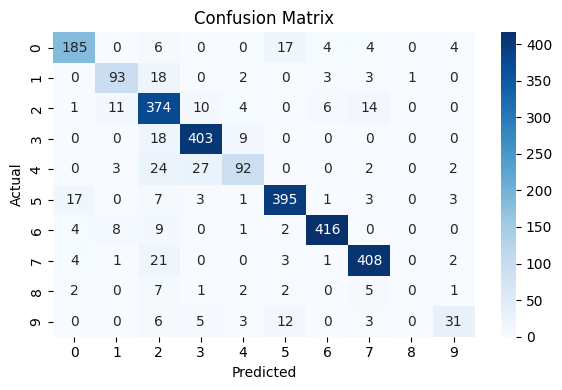


🔹 LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 10920, number of used features: 10
[LightGBM] [Info] Start training from score -2.518429
[LightGBM] [Info] Start training from score -3.124565
[LightGBM] [Info] Start training from score -1.871802
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -2.901422
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -4.916325
[LightGBM] [Info] Start training from score -3.817712
📊 Evaluation Metrics:
Accuracy : 0.8937728937728938
Precision: 0.8909067983872015
Recall   : 0.8937728937728938
F1 Score : 0.8902870711493691

📋 Classification

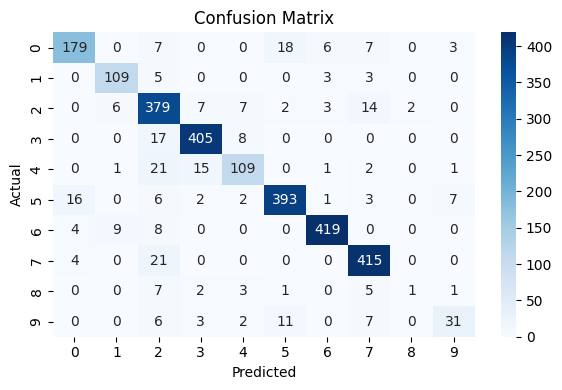


🔹 Random Forest
📊 Evaluation Metrics:
Accuracy : 0.8813186813186813
Precision: 0.8749498357972054
Recall   : 0.8813186813186813
F1 Score : 0.8754882193640356

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       220
           1       0.84      0.84      0.84       120
           2       0.79      0.89      0.83       420
           3       0.91      0.94      0.93       430
           4       0.84      0.65      0.73       150
           5       0.91      0.93      0.92       430
           6       0.94      0.95      0.95       440
           7       0.90      0.93      0.91       440
           8       0.00      0.00      0.00        20
           9       0.81      0.43      0.57        60

    accuracy                           0.88      2730
   macro avg       0.78      0.74      0.75      2730
weighted avg       0.87      0.88      0.88      2730



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


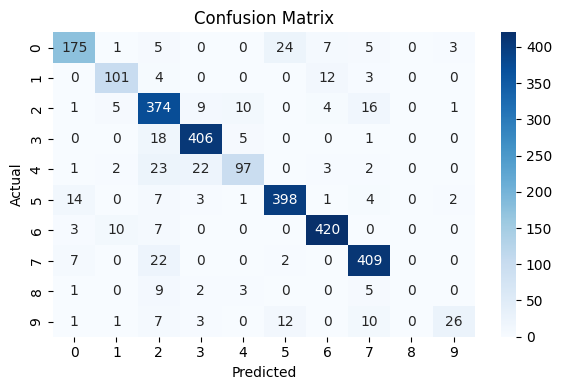


🔹 XGBoost
📊 Evaluation Metrics:
Accuracy : 0.8761904761904762
Precision: 0.8710306266505032
Recall   : 0.8761904761904762
F1 Score : 0.871340584403973

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       220
           1       0.86      0.85      0.86       120
           2       0.76      0.89      0.82       420
           3       0.92      0.90      0.91       430
           4       0.77      0.65      0.71       150
           5       0.91      0.92      0.91       430
           6       0.95      0.96      0.96       440
           7       0.90      0.94      0.92       440
           8       0.00      0.00      0.00        20
           9       0.72      0.43      0.54        60

    accuracy                           0.88      2730
   macro avg       0.77      0.73      0.75      2730
weighted avg       0.87      0.88      0.87      2730



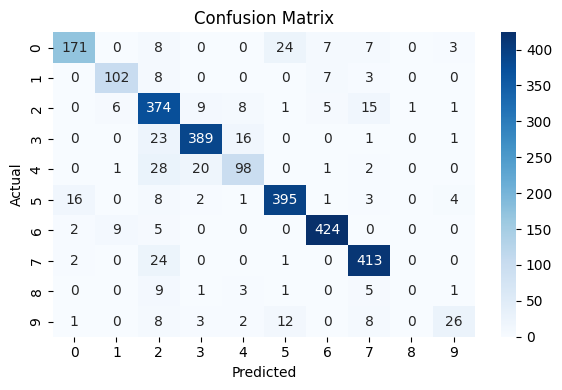

In [17]:
from sklearn.svm import SVC
print("\nTraining SVM model...")
svm_shap_model = SVC(
    probability=True,  # Cần thiết cho SHAP
    kernel='rbf',
    C=1.0,
    random_state=42
)
svm_shap_model.fit(X_train, y_train)

# Sử dụng SHAP để giải thích mô hình SVM
print("\nCalculating SHAP values for SVM model...")
# Với SVM, sử dụng KernelExplainer thay vì TreeExplainer
explainer_svm = shap.KernelExplainer(
    model=svm_shap_model.predict_proba, 
    data=shap.sample(X_train, 50)  # Lấy mẫu để tăng tốc độ tính toán
)
shap_values_svm = explainer_svm.shap_values(X_train[:50])  # Tính SHAP trên mẫu nhỏ hơn để tăng tốc

# Tính mean absolute SHAP values cho từng feature
# Với mô hình đa lớp, lấy giá trị trung bình qua các lớp
shap_importance_svm = np.zeros(X_train.shape[1])
for class_idx in range(len(shap_values_svm)):
    shap_importance_svm += np.abs(shap_values_svm[class_idx]).mean(axis=0)
shap_importance_svm = shap_importance_svm / len(shap_values_svm)  # Normalize by number of classes

# Hiển thị SHAP summary plot cho SVM
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_svm, X_train[:50], plot_type="bar", show=False)
plt.title("SHAP Feature Importance (SVM)")
plt.tight_layout()
plt.show()

# Chọn features dựa trên SHAP values từ SVM
X_train_svm_shap_selected, X_test_svm_shap_selected, svm_shap_selected_features = select_features(
    X_train, X_test, shap_importance_svm
)

# Đánh giá mô hình sau khi chọn feature bằng SHAP với SVM
svm_shap_selected_models = evaluate_models(
    X_train_svm_shap_selected, X_test_svm_shap_selected, 
    y_train, y_test, "SVM SHAP Selected"
)


Training Random Forest model...

Calculating SHAP values for Random Forest model...


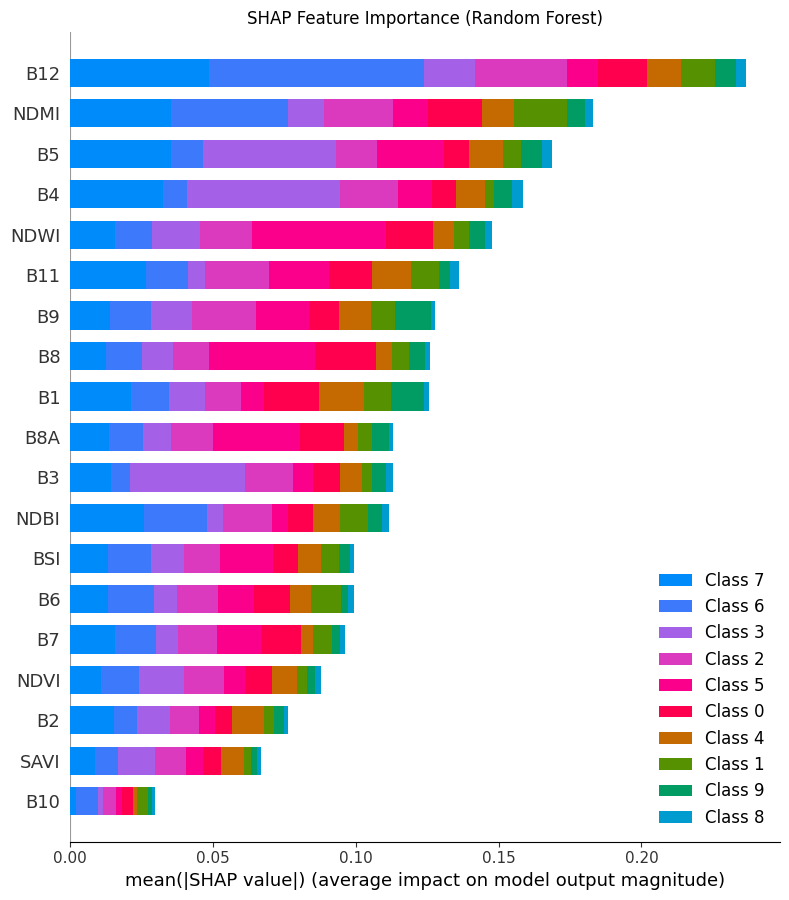

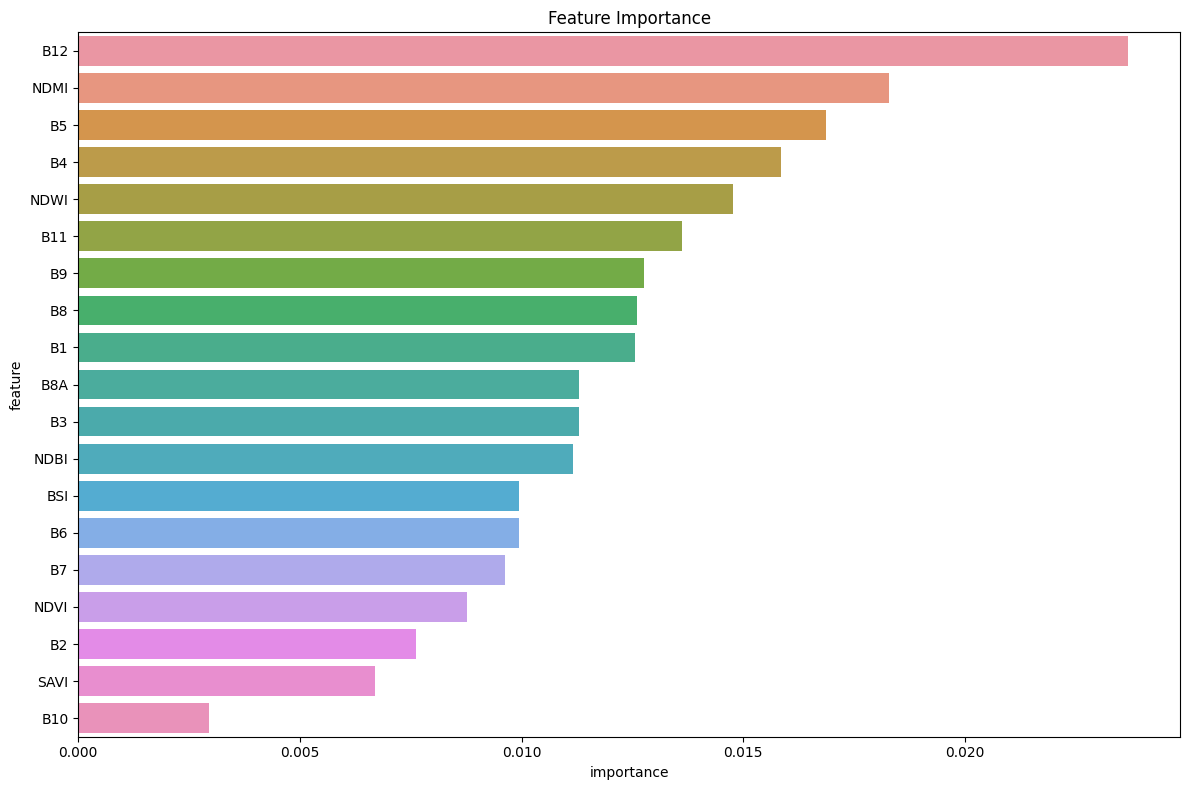

Số lượng features được chọn: 10 / 19
Các features được chọn: ['B12', 'NDMI', 'B5', 'B4', 'NDWI', 'B11', 'B9', 'B8', 'B1', 'B8A'] 

Đánh giá mô hình với Random Forest SHAP Selected features
Số lượng features: 10

🔹 Support Vector Machine (SVM)
📊 Evaluation Metrics:
Accuracy : 0.8809523809523809
Precision: 0.8753539956965827
Recall   : 0.8809523809523809
F1 Score : 0.876738773883932

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       220
           1       0.78      0.78      0.78       120
           2       0.77      0.87      0.82       420
           3       0.92      0.93      0.92       430
           4       0.83      0.67      0.74       150
           5       0.91      0.91      0.91       430
           6       0.97      0.96      0.96       440
           7       0.91      0.94      0.92       440
           8       0.00      0.00      0.00        20
           9       0.79      0.55      0.65     

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


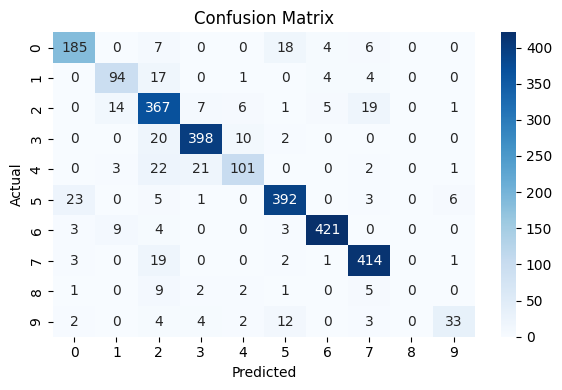


🔹 LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 10920, number of used features: 10
[LightGBM] [Info] Start training from score -2.518429
[LightGBM] [Info] Start training from score -3.124565
[LightGBM] [Info] Start training from score -1.871802
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -2.901422
[LightGBM] [Info] Start training from score -1.848272
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -1.825282
[LightGBM] [Info] Start training from score -4.916325
[LightGBM] [Info] Start training from score -3.817712
📊 Evaluation Metrics:
Accuracy : 0.9
Precision: 0.896219423330808
Recall   : 0.9
F1 Score : 0.8965879860696101

📋 Classification Report:
               precisi

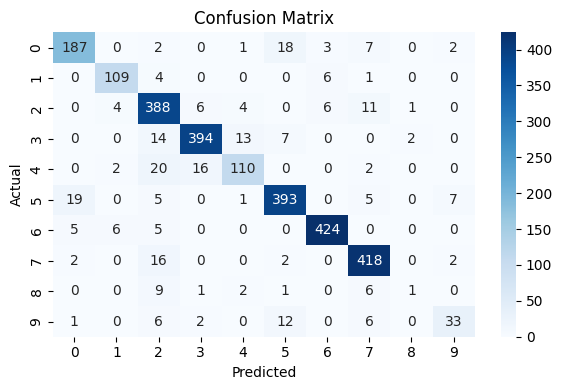


🔹 Random Forest
📊 Evaluation Metrics:
Accuracy : 0.8912087912087913
Precision: 0.8853555364869075
Recall   : 0.8912087912087913
F1 Score : 0.8861804043210285

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       220
           1       0.88      0.86      0.87       120
           2       0.80      0.90      0.84       420
           3       0.93      0.93      0.93       430
           4       0.83      0.69      0.76       150
           5       0.91      0.92      0.92       430
           6       0.94      0.96      0.95       440
           7       0.91      0.94      0.92       440
           8       0.00      0.00      0.00        20
           9       0.88      0.48      0.62        60

    accuracy                           0.89      2730
   macro avg       0.80      0.75      0.77      2730
weighted avg       0.89      0.89      0.89      2730



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


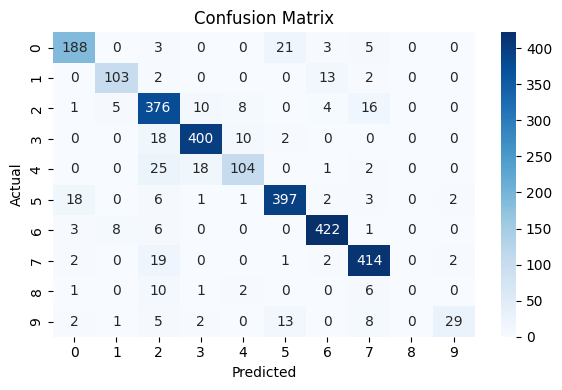


🔹 XGBoost
📊 Evaluation Metrics:
Accuracy : 0.8838827838827839
Precision: 0.8794668767947088
Recall   : 0.8838827838827839
F1 Score : 0.8801580901578887

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       220
           1       0.86      0.88      0.87       120
           2       0.78      0.90      0.84       420
           3       0.93      0.90      0.91       430
           4       0.80      0.68      0.74       150
           5       0.90      0.92      0.91       430
           6       0.96      0.95      0.96       440
           7       0.91      0.93      0.92       440
           8       0.00      0.00      0.00        20
           9       0.81      0.58      0.68        60

    accuracy                           0.88      2730
   macro avg       0.78      0.76      0.77      2730
weighted avg       0.88      0.88      0.88      2730



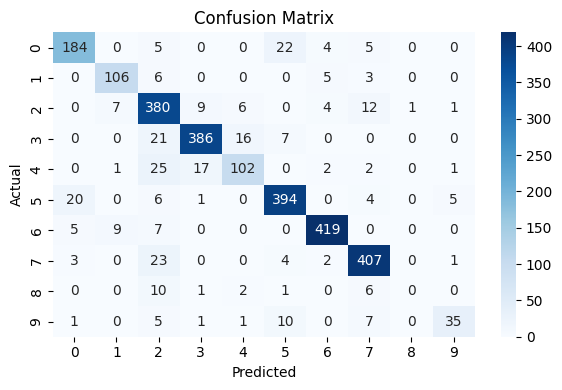

In [18]:
from sklearn.ensemble import RandomForestClassifier
print("\nTraining Random Forest model...")
rf_shap_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf_shap_model.fit(X_train, y_train)

# Sử dụng SHAP để giải thích mô hình Random Forest
print("\nCalculating SHAP values for Random Forest model...")
explainer_rf = shap.TreeExplainer(rf_shap_model)
shap_values_rf = explainer_rf.shap_values(X_train)

# Tính mean absolute SHAP values cho từng feature
# Với Random Forest, cấu trúc shap_values có thể khác LightGBM
# Kiểm tra xem shap_values_rf có phải là list của các mảng (multi-class) hay không
if isinstance(shap_values_rf, list):
    # Trường hợp multi-class
    shap_importance_rf = np.zeros(X_train.shape[1])
    for class_idx in range(len(shap_values_rf)):
        shap_importance_rf += np.abs(shap_values_rf[class_idx]).mean(axis=0)
    shap_importance_rf = shap_importance_rf / len(shap_values_rf)  # Normalize
else:
    # Trường hợp binary-class
    shap_importance_rf = np.abs(shap_values_rf).mean(axis=0)

# Hiển thị SHAP summary plot cho Random Forest
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_rf, X_train, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# Chọn features dựa trên SHAP values từ Random Forest
X_train_rf_shap_selected, X_test_rf_shap_selected, rf_shap_selected_features = select_features(
    X_train, X_test, shap_importance_rf
)

# Đánh giá mô hình sau khi chọn feature bằng SHAP với Random Forest
rf_shap_selected_models = evaluate_models(
    X_train_rf_shap_selected, X_test_rf_shap_selected, 
    y_train, y_test, "Random Forest SHAP Selected"
)